<a href="https://colab.research.google.com/github/adnan119/Object-Detection-Projects/blob/master/Selective_Search_for_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/My\ Drive/Images

/content/drive/My Drive/Images


In [ ]:
import random
import time
import cv2
from google.colab.patches import cv2_imshow

In [16]:
image = cv2.imread("hm.jpeg")
# initialize OpenCV's selective search implementation and set the
# input image
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(image)

ss.switchToSelectiveSearchQuality()

In [17]:
# run selective search on the input image
start = time.time()
rects = ss.process()
end = time.time()
# show how along selective search took to run along with the total
# number of returned region proposals
print("[INFO] selective search took {:.4f} seconds".format(end - start))
print("[INFO] {} total region proposals".format(len(rects)))

[INFO] selective search took 1.8935 seconds
[INFO] 577 total region proposals


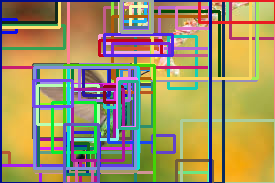

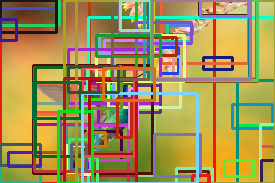

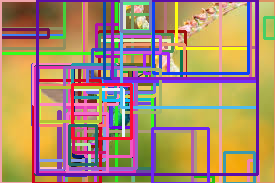

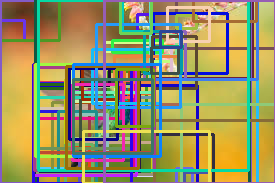

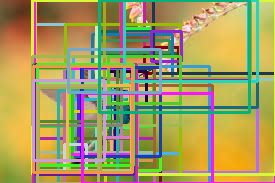

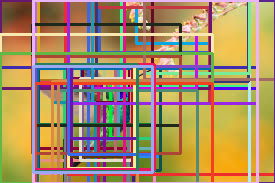

In [18]:
# loop over the region proposals in chunks (so we can better
# visualize them)
for i in range(0, len(rects), 100):
	# clone the original image so we can draw on it
	output = image.copy()
	# loop over the current subset of region proposals
	for (x, y, w, h) in rects[i:i + 100]:
		# draw the region proposal bounding box on the image
		color = [random.randint(0, 255) for j in range(0, 3)]
		cv2.rectangle(output, (x, y), (x + w, y + h), color, 2)
	# show the output image
	cv2_imshow(output)
	key = cv2.waitKey(0) & 0xFF
	# if the `q` key was pressed, break from the loop
	if key == ord("q"):
		break

